# PyTorch Basics for ML

In [2]:
import torch
import numpy as np

In [3]:
# Creating tensors in Pytorch
np.set_printoptions(precision=3)
a = [1,2,3]
b = np.array([4,5,6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)


tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [4]:
# ones
t_ones = torch.ones(2,3)
print(t_ones.shape)
print(t_ones)

torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [5]:
# random tensor values
rand_tensor = torch.rand(2,3)
print(rand_tensor)

tensor([[0.1592, 0.3766, 0.9073],
        [0.8678, 0.5740, 0.7796]])


## Manipulating the data type and shape of a tensor

In [6]:
# changing data type
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [7]:
# Transpose of a tensor
t = torch.rand(3,5)
t_tr = torch.transpose(t,0,1)
print(t.shape ,'--> ', t_tr.shape)

torch.Size([3, 5]) -->  torch.Size([5, 3])


In [8]:
# reshaping a tensor
t = torch.zeros(30)
print(t.shape)
t_reshape = t.reshape(5,6)
print(t_reshape.shape)

torch.Size([30])
torch.Size([5, 6])


In [9]:
# removing unnecessary dimensions
t = torch.zeros(1,2,1,4,1,)
t_sqz = torch.squeeze(t, 2)
print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


## Mathematical Operations to tensors

In [10]:
# uniform distribution and normal distribution
torch.manual_seed(1)
t1 = 2 * torch.rand(5,2) - 1
t2 = torch.normal(mean=0,std=1,size=(5,2)) 

In [11]:
print(t1)
print(t2)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [12]:
# t1 and t2 has the same shape. Element-wise product
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [13]:
# mean, sum, and std across a certain axis
t4 = torch.mean(t1, dim=0)
print(t4)

tensor([-0.1373,  0.2028])


In [14]:
# matrix-matrix multiplication
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [15]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [16]:
# norm of a tensor
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


## Split, stack and concatenate tensors

In [17]:
# providing number of splits
torch.manual_seed(1)
t = torch.rand(6)
print(t)
t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [18]:
# providing size of different splits
torch.manual_seed(1)
t = torch.rand(5)
print(t)
t_splits = torch.split(t, split_size_or_sections=[3,2])
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [19]:
# concatencate multiple tensors
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], dim=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [20]:
# stack multiple tensors
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A,B], dim=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## Building input pipelines in PyTorch

If the data already exists in the form of a tensor object, a Python list, or a NumPy array, we can easily
create a dataset loader using the torch.utils.data.DataLoader() class. It returns an object of the
DataLoader class, which we can use to iterate through the individual elements in the input dataset.

In [21]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [22]:
# creating batches with batch size of 3
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f"Batch {i}:", batch)

Batch 1: tensor([0., 1., 2.])
Batch 2: tensor([3., 4., 5.])


## Combining two tesnsors in a joint dataset

In [23]:
torch.manual_seed(1)
t_x = torch.rand([4,3], dtype=torch.float32)
t_y = torch.arange(4)


In [24]:
from torch.utils.data import Dataset
class JointDataset(Dataset):
    def __init__(self,x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index],self.y[index]
        

A custom Dataset class must contain the following methods to be used by the data loader later on:
- __init__(): This is where the initial logic happens, such as reading existing arrays, loading a
file, filtering data, and so forth.
- __getitem__(): This returns the corresponding sample to the given index.

In [25]:
joint_dataset = JointDataset(t_x, t_y)
for example in joint_dataset:
    print(' x: ', example[0], ' y: ', example[1])

 x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
 x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
 x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
 x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


## Shuffle, batch and repeat

In [26]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

In [27]:
for i, batch in enumerate(data_loader,1):
    print(f'Batch {i}:','x:', batch[0],
        '\n              y:', batch[1])

Batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
              y: tensor([2, 0])
Batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
              y: tensor([1, 3])


When training a model for multiple epochs, we need to shuffle and iterate over the dataset
by the desired number of epochs. So, let’s iterate over the batched dataset twice:

In [28]:
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader,1):
        print(f'Batch {i}:','x:', batch[0],
            '\n              y:', batch[1])

epoch 1
Batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
              y: tensor([0, 2])
Batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
              y: tensor([1, 3])
epoch 2
Batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
              y: tensor([3, 2])
Batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
              y: tensor([0, 1])


## Creating a dataset from files on the local storage disk

In [30]:
# content of these files
import pathlib
imgdir_path = pathlib.Path('/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/cat_dog_images/cat-01.jpg', '/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/cat_dog_images/cat-02.jpg', '/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/cat_dog_images/cat-03.jpg', '/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/cat_dog_images/dog-01.jpg', '/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/cat_dog_images/dog-02.jpg', '/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/cat_dog_images/dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


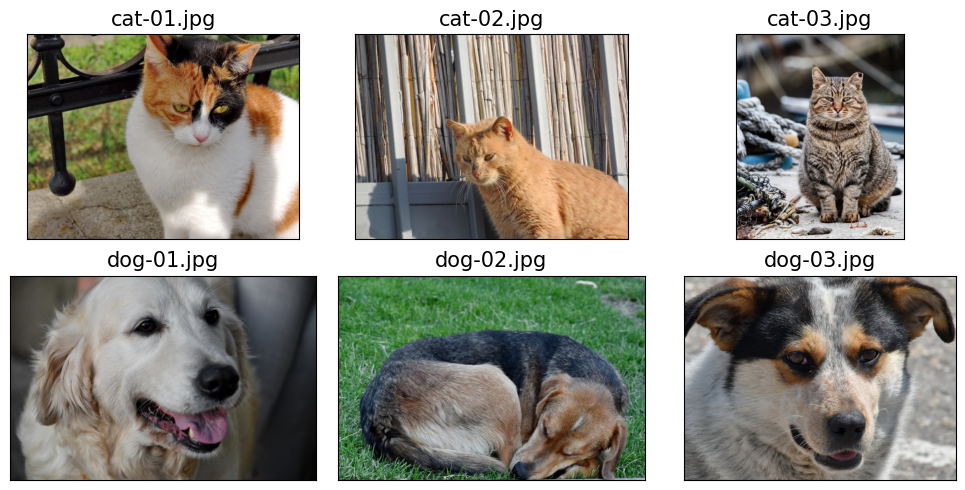

In [31]:
# visualizing the images
import matplotlib.pyplot as plt
import os
from PIL import Image
fig = plt.figure(figsize=(10,5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [32]:
# extracting labels from file names
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


Now, we have two lists: a list of filenames (or paths of each image) and a list of their labels. In the pre-
vious section, you learned how to create a joint dataset from two arrays. Here, we will do the following:

In [33]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

In [34]:
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/cat_dog_images/cat-01.jpg 0
/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/cat_dog_images/cat-02.jpg 0
/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/cat_dog_images/cat-03.jpg 0
/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/cat_dog_images/dog-01.jpg 1
/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/cat_dog_images/dog-02.jpg 1
/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/cat_dog_images/dog-03.jpg 1


Next, we need to apply transformations to this dataset: load the image content from its file path, de-
code the raw content, and resize it to a desired size, for example, 80×120. As mentioned before, we
use the torchvision.transforms module to resize the images and convert the loaded pixels into
tensors as follows:

In [35]:
import torchvision.transforms as transforms
img_height, img_width = 80,120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

In [36]:
# updating the ImageDataset class with the new transformations
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.file_list)
    
image_dataset = ImageDataset(file_list, labels, transform=transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.000551827..1.0000002].


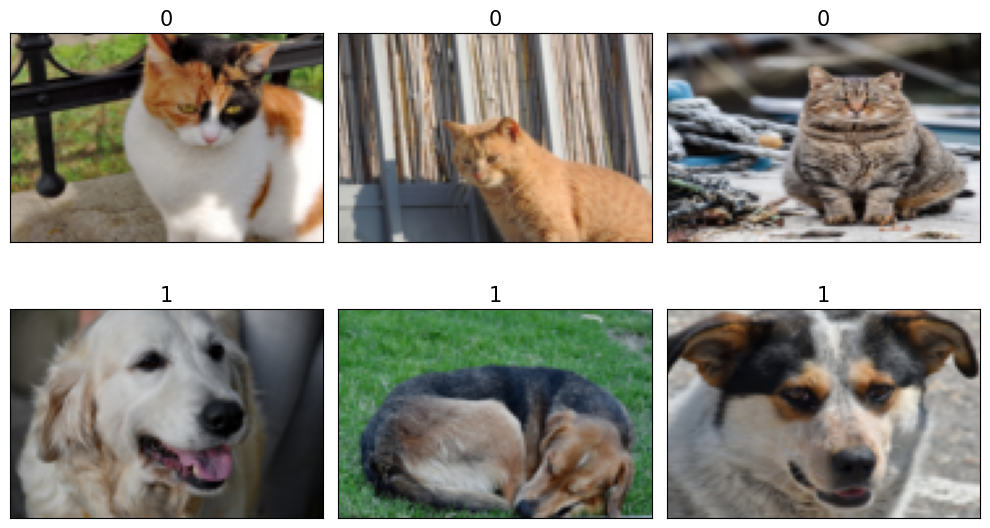

In [37]:
# visualizing the transformed images
fig = plt.figure(figsize=(10,6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2,3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1,2,0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

## Fetching available datasets from the torchvision.datasets library

The torchvision datasets (https://pytorch.org/vision/stable/datasets.html) are nicely format-
ted and come with informative descriptions, including the format of features and labels and their type
and dimensionality, as well as the link to the original source of the dataset. Another advantage is that
these datasets are all subclasses of torch.utils.data.Dataset, so all the functions we covered in the
previous sections can be used directly.

In [ ]:
import torchvision
image_path = '/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/'
celeba_dataset = torchvision.datasets.CelebA(
    image_path, split='train', target_type='attr', download=True
)

In [ ]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [ ]:
example = next(iter(celeba_dataset))
print(example)

In [ ]:
from itertools import islice
fig = plt.figure(figsize=(12,8))
for i, (image, attributes) in islice(enumerate(celeba_dataset),18):
    ax = fig.add_subplot(3,6, i+1)
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}',size=15)
plt.show()

(<PIL.Image.Image image mode=L size=28x28 at 0x1287B1400>, 5)


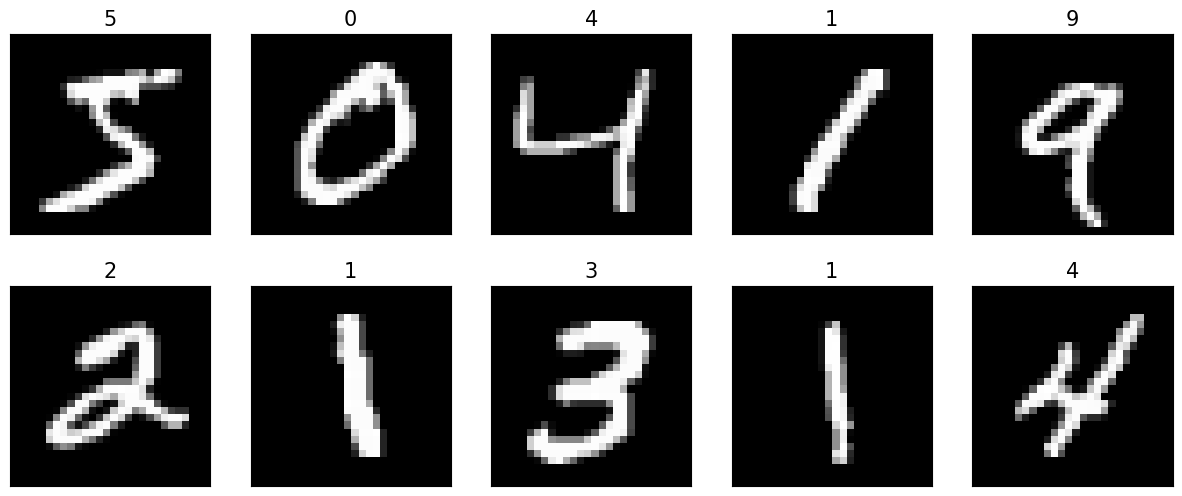

In [43]:
#mnist dataset
import torch.utils
import torch.utils.data
from itertools import islice

image_path = '/Users/subashpandey/Desktop/ML-DL-From-Scratch/data/'
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)
assert isinstance(mnist_dataset, torch.utils.data.Dataset)
example = next(iter(mnist_dataset))
print(example)
fig = plt.figure(figsize=(15,6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2,5, i+1)
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(image, cmap='grey')
    ax.set_title(f'{label}',size=15)
plt.show()